# CM3060 Natural Language Processing
### Coursework Assignment: Text classification

## Introduction

Sentiment analysis, a branch of text classification within Natural Language Processing (NLP), provides both theoretical frameworks and practical techniques for identifying emotions or attitude in text. It is used in numerous fields including social media analysis, product review assessment, customer service, and market research. This project explores key areas of NLP by selecting appropriate sentiment analysis methods and applying them to a real-world dataset, addressing a particular text classification challenge in interpreting customer feedback from online reviews.

### Problem area

According to a Local Consumer Review Survey (Yelp, 2012) "The majority of consumers surveyed use online reviews to make spending decisions." and "72% of consumers give the same weight to online reviews as they do to personal recommendations." Luca (2011) states that a one-star increase in Yelp rating leads to a 5-9 percent increase in revenue and that online consumer reviews substitute for more traditional forms of reputation. All of this suggests that online reviews are a valuable source of information for businesses and consumers alike.

One particular task that can be addressed with the review data is to track how customers opinion changes over time. For instance, a business made some changes to their product or service and wants to know how customers react to these changes. This can be done by analyzing the sentiment of reviews and identifying trends in customer feedback. However, the huge volume of text data generated by online reviews makes it difficult to manually analyze and interpret customer opinions. Star ratings are not always available and not always reliable indicator of customer satisfaction, as they may not reflect the actual sentiment of the review text. Sentiment analysis provides a solution to this problem by automatically classifying the sentiment of text, allowing businesses to efficiently analyze customer feedback, track tendencies, and make informed decisions.

With the rapid development of NLP and machine learning, a number of pre-trained sentiment analysis methods have been proposed. There are free and commercial sentiment analysis tools available, that divide into three main categories: rule-based systems, machine learning algorithms, and deep learning models. Here are some examples from each category:

* [Natural Language Toolkit (NLTK)](https://www.nltk.org/) a Python NLP library that provides both rule-based and machine learning-based sentiment analysis tools. In particular, `nltk.sentiment.vader` module implements a rule-based sentiment analysis tool using VADER (Valence Aware Dictionary and sEntiment Reasoner) (Hutto, C.J., Gilbert, E.E., 2014). A `nltk.sentiment.sentiment_analyzer` module implements a machine learning-based sentiment analysis tool that uses a Naive Bayes classifier (Martiti, Juliane C., 2021.)

* [TextBlob](https://textblob.readthedocs.io/en/dev/) another Python library for processing textual data. It also provides two sentiment analysis implementations: PatternAnalyzer, based on a `pattern` library, and NaiveBayesAnalyzer, a Naive Bayes classifier trained on a movie reviews corpus.

* [Hugging Face Pipelines](https://huggingface.co/docs/transformers/main_classes/pipelines) is an abstraction built on top of the [Transformers](https://huggingface.co/transformers/) library that provides a simple API to use pre-trained models for a variety of NLP tasks. It includes a sentiment analysis pipeline that by default uses a DistilBERT model (Sanh V., et al., 2020) finetuned on the [SST-2](https://huggingface.co/datasets/sst2) dataset. Another currently cunsidered state-of-the-art model for sentiment analysis is BERT (Devlin, J., et al., 2018), which is also available in the Transformers library.

However, these tools may not always perform well in a specific area. For example, the sentiment of a review may be influenced by the product category, and the same word may have different meanings in different domains. While these tools can give a baseline level of performance for comparison, creating a model tailored to a specific domain could enhance the accuracy of classifying sentiments.

### Objectives

The main goal of this project is to develop a machine learning model for sentiment analysis of online reviews. This model will be trained using a dataset of customer reviews at Yelp, applying supervised learning methods. The star ratings accompanying the reviews will serve as labels. The sentiment analysis tools split into two categories by the type of output: categorical and regression. The categorical model aims to predict the sentiment as a category "positive", "neutral", or "negative". The regression model aims to predict the sentiment as a continuous variable, usually in the range from -1 to 1, where -1 is a negative sentiment, 0 is a neutral sentiment, and 1 is a positive sentiment.

We will evaluate both categorical and regression approaches, as the star ratings can be treated as both categorical and continuous variables. Also, both rule-based and machine learning-based models will be considered. The performance of the model will be compared against pre-trained sentiment analysis tools mentioned above, as well as baseline models. Through this comparison, the project aims to determine whether a domain-specialized model can enhance the accuracy of sentiment detection in specific context.

Additionally, the project will explore how star ratings in online reviews correlate with expressed sentiments. This investigation will contribute to a deeper understanding of sentiment analysis within NLP, providing meaningful insights for both the business sector and academic researchers.

### Dataset

The [Yelp Open Dataset](https://www.yelp.com/dataset) is a dataset provided by Yelp Inc contains a curated sample of Yelp's businesses, reviews, and user data. As stated in their [terms of use](https://s3-media0.fl.yelpcdn.com/assets/srv0/engineering_pages/f64cb2d3efcc/assets/vendor/Dataset_User_Agreement.pdf), "The Data is made available by Yelp Inc. (“Yelp”) to enable you to access valuable local information to develop an academic project as part of an ongoing course of study." Therefore, the dataset is suitable and permitted for use in this project.

The dataset is available in JSON format and can be downloaded from [here](https://www.yelp.com/dataset/) upon request. Yelp provides a documentation for the dataset [here](https://www.yelp.com/dataset/documentation/main). The dataset contains 6,685,900 reviews, 192,609 businesses, 200,000 pictures covering 10 metropolitan areas. The dataset is regularly updated and the current version (as of 19 December 2020) contains 8,021,122 reviews, 209,393 businesses, 1,334,097 pictures covering 11 metropolitan areas. For the purpose of this project, a `yelp_academic_dataset_review.json` will be used which contains the following fields:

| Field      | Example | Description |
| ----------- | ------ | ----------- |
| review_id | zdSx_SD6obEhz9VrW9uAWA | string, 22 character unique review id |
| user_id | Ha3iJu77CxlrFm-vQRs_8g | string, 22 character unique user id, maps to the user in user.json |
| business_id | tnhfDv5Il8EaGSXZGiuQGg | string, 22 character business id, maps to business in business.json |
| stars | 4 | integer, star rating |
| date | 2016-03-09 | string, date formatted YYYY-MM-DD |
| text | Great place to hang out after work | string, the review itself |
| useful | 0 | integer, number of useful votes received |
| funny | 0 | integer, number of funny votes received |
| cool | 0 | integer, number of cool votes received |

More detailed exploratory analysis of the dataset can be found below.

### Critical analysis

The "stars" field contains a number of starts from 1 to 5 that a user gave to a business. This is only an assumption that field represents the sentiment of the review text. For instance, a user may give a 4-star rating to a business, but write a review with a negative sentiment. Another worth mentioning issue is that the "stars" is a number, it is not a continuous variable, as it can only take a discrete number of values (1,2,3,4,5). It is possible to use it as a label for a regression model, but it can introduce bias.

Among other issues, the dataset is said to be regularly updated and this can be an issue for reproducibility of the results in absence of versioning the dataset. Also, the dataset includes only curated list of reviews called [Recommended Reviews](https://www.yelp-support.com/Recommended_Reviews), which may introduce bias, as the language used in these reviews may be different from the language used in other reviews. Finally, the dataset is not balanced in terms of the number of reviews per star rating, you can find more information on this in the exploratory analysis section below.

### Evaluation methodology

The project aims to evaluate sentiment analysis in online reviews using both categorical and regression models. The reviews include texts and a discrete star ratings (1 to 5). These star ratings could be treated as both categorical and continuous variables. But it makes more sense to treat them as a continuous variable as the error between 1 and 2 stars is less than the error between 1 and 4 stars. The categorical models, in contrast, threat all categories as independent labels.

However, most of related papers use categorical output for sentiment analysis: "positive", "neutral", or "negative". Because of this, there papers often use metrics that usually applicable for classification tasks, such as accuracy, precision, recall, and F1 score. For instance, it a related work Implementation of Naive Bayes Algorithm on Sentiment Analysis Application (Sari, 2018) the accuracy was used to evaluate the performance of the model. The accuracy of 99.62% was obtained on the dataset of 457 sentences. In another related work, Using Machine Learning to Predict the Sentiment of Online Reviews: A New Framework for Comparative Analysis (Satia, 2021) all four metrics were used to evaluate the performance of the model. This paper compared the performance of different models on the same dataset. The best results were obtained by the Multilayer Perceptron (MLP) model with the accuracy of 90.38%, precision of 90.33%, recall of 90.38%, and F1 score of 90.35%.

With regression models, the sentiment of a review will be compared against the star rating, that will be treated as a continuous variable with five possible values (1.0, 2.0, 3.0, 4.0, 5.0). The prediction will be compared to the actual star rating given by the reviewer. To assess the model's accuracy, _Mean Absolute Error_ (MAE), _Mean Squared Error_ (MSE), and _Root Mean Squared Error_ (RMSE) are most commonly used metrics. The difference between them is that MSE is more sensitive to outliers than MAE, and RMSE is even more sensitive to outliers than MSE. But these metrics do not capture the full picture of the model's performance. For example, the small error can be spread across a large range of values or a big error concentrated in a small range.

To overcome this problem, _R-squared_ (R2) metric can be used. R2, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It is a statistical measure of how close the data are to the fitted regression line. The formula for R2 is:

$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$

where $SS_{res}$ is the sum of squares of residuals and $SS_{tot}$ is the total sum of squares.

It takes values from 0 to 1, where 0 indicates that the model explains none of the variability of the response data around its mean, and 1 indicates that the model explains all the variability of the response data around its mean. The closer the R2 to 1, the better the model fits the data. In this project, the R2 metric will be the primary metric to evaluate the performance of the regression models. The same helper functions `calculate_regression_metrics` will be used to evaluate the performance of this kind of models to ensure consistency in the evaluation process.

## Implementation

Note: All code below is my one, it is marked explicitly where I used code from other sources.

### Requirements

Python 3.12 or higher is required. The following packages are required:

In [1]:
%pip install pandas==2.1.4 \
             jupyterlab==4.0.9 \
             nltk==3.8.1 \
             textblob==0.17.1 \
             parallel-pandas==0.6.2 \
             scikit-learn==1.3.2 \
             seaborn==0.13.0 \
             matplotlib==3.8.2 \
             transformers==4.36.2 \
             torch \
             accelerate \
             datasets \
             ipywidgets \
             trl \
             tqdm==4.66.1 > /dev/null


Note: you may need to restart the kernel to use updated packages.


In [2]:
import os

# Pandas for dataset manipulation
import pandas as pd

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# progress bar
from tqdm.auto import tqdm

## SKLearn imports for ML tasks and metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, fbeta_score

# Feature extraction for NLP
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

# ML models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Utils
from sklearn.utils import resample

# NLP libraries
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# for transformers (huggingface) pipelines
from transformers import pipeline
import torch

# for fine-tuning of transformers
from datasets import Dataset
from trl import SFTTrainer
from transformers import TrainingArguments

/Users/dima/dev/cm3060_nlp_midterm/.venv/lib/python3.12/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/Users/dima/dev/cm3060_nlp_midterm/.venv/lib/python3.12/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


Enable a progress bar for pandas `apply` method:

In [3]:
tqdm.pandas()

Set a Seaborn theme for matplotlib plots:


In [4]:
sns.set_theme()

[ParallelPandas](https://github.com/dubovikmaster/parallel-pandas) is a package for parallel processing of Pandas DataFrames. It provides a parallel implementation of Pandas methods. In particular, it provides a parallel implementation of `apply` method `p_apply`, which is used in this project to perform parallel preprocessing of the dataset. For the first baseline model, it speeds up the preprocessing by x5 times for 100K reviews set.

In [5]:
from parallel_pandas import ParallelPandas

ParallelPandas.initialize()

### Helper functions

In [6]:
def calculate_regression_metrics(y_true, y_pred, diagnostic = False):
    """
    Calculate and print MSE, R2, and Correlation for a regression task
    """
    if diagnostic:
        # Print all metrics only if diagnostic flag specified
        print(f"MSE = {mean_squared_error(y_true, y_pred)}")
        print(f"Correlation = {y_true.corr(y_pred)}")
    
    # Print the target metric for a classification task
    print(f"R2 = {r2_score(y_true, y_pred)}")


In [49]:
def calculate_classification_metrics(y_true, y_pred, diagnostic = False):
    """
    Calculate and print accuracy and F2 score for classification tasks
    """
    if diagnostic:
        # Print all metrics only if diagnostic flag specified
        print(f"Accuracy = {accuracy_score(y_true, y_pred)}")
        print(f"Precision = {precision_score(y_true, y_pred)}")
        print(f"Recall = {recall_score(y_true, y_pred)}")

    # Print the target metric for a classification task
    print(f"F2 score = {fbeta_score(y_true, y_pred, beta=2, average='weighted')}")

In [8]:
def histogram_plot(y_true, y_pred):
    """
    Plot histograms of the true and predicted values
    """
    plt.hist(y_true, alpha=0.5, label='Star rating')
    plt.hist(y_pred, alpha=0.5, label='Estimated sentiment')

    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histograms of Star rating and Estimated sentiment ')
    plt.legend()

    # Show the plot
    plt.show()

In [9]:
# A MinMax normalization function for a list of values
def normalize_list(values):
    min_val = min(values)
    max_val = max(values)

    range_val = max_val - min_val
    if range_val == 0:
        # Avoid division by zero if all values are the same
        return [0 for _ in values]

    return [(x - min_val) / range_val for x in values]

### Data preparation

The dataset should be downloaded from [Yelp](https://www.yelp.com/dataset/), unzipped, and placed in the `yelp_dataset` folder.

Please note: The dataset is quite large and loading takes time. It took 8 minutes on Apple M1 16 GB RAM.

In [10]:
df = pd.read_json("yelp_dataset/yelp_academic_dataset_review.json", orient="records", lines=True)

The overall structure of the dataset:

In [10]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


We are interested in only stars and text:

In [11]:
df = df[["stars", "text"]]

Save the dataset to a pickle file so that it can be reused later:

In [12]:
df.to_pickle("dataset.pkl")

In [10]:
df = pd.read_pickle("dataset.pkl")

### Preprocessing

We do not have a general preprocessing function, as each method considered and evaluated below uses its unique preprocessing function with specific settings, usually prescribed by the method's paper. `CountVectorizer` for Naive Bayes, `TfidfVectorizer` for Support Vector Machine (SVM), etc. Common steps in these functions often involve removing stop words and breaking the text into tokens. As recommended in related studies, like VADER by Hutto et al. (2014), punctuation and capital letters are kept in the text, as they can carry important sentiment information.

### Dataset Exploratory Analysis

In [11]:
df.head()

,stars,text
0,3,"If you decide to eat here, just be aware it is..."
1,5,I've taken a lot of spin classes over the year...
2,3,Family diner. Had the buffet. Eclectic assortm...
3,5,"Wow! Yummy, different, delicious. Our favo..."
4,4,Cute interior and owner (?) gave us tour of up...


In [12]:
df.describe()

,stars
count,6.990280e+06
mean,3.748584e+00
std,1.478705e+00
min,1.000000e+00
25%,3.000000e+00
50%,4.000000e+00
75%,5.000000e+00
max,5.000000e+00


The stars field is skewed towards 5 stars:

<Axes: xlabel='stars'>

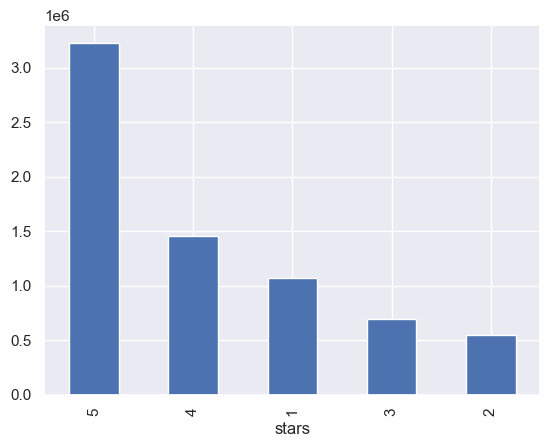

In [13]:
df["stars"].value_counts().plot(kind="bar")

### Balancing the dataset

Since the dataset is skewed towards 5 stars, we will balance it by undersampling the populated classes. The balancing is necessary to avoid bias towards the majority class. Also, a pre-trained model could have a bias towards the majority class so the evaluation of the model's performance on the balanced dataset will be more accurate.

In [14]:
min_class_count = df['stars'].value_counts().min()

df_resampled_list = []

for class_index in df['stars'].unique():
    df_class = df[df['stars'] == class_index]
    
    # Randomly undersample the majority classes
    df_class_resampled = resample(df_class, 
                                  replace = False,    # sample without replacement
                                  n_samples = min_class_count, # to match minority class
                                  random_state = 321)

    # Append the resampled DataFrame to the list
    df_resampled_list.append(df_class_resampled)

df = pd.concat(df_resampled_list)

Randomize the dataset:

In [15]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

Checking:

<Axes: xlabel='stars'>

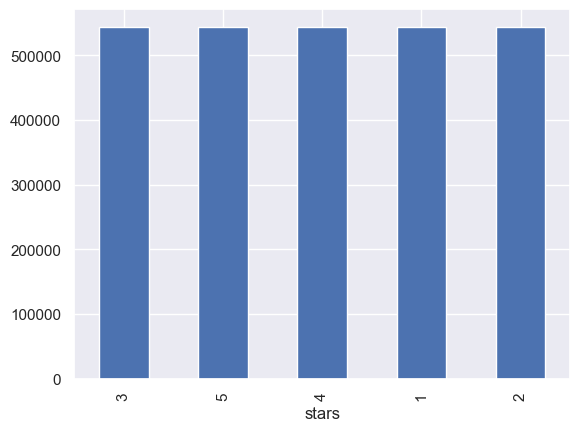

In [16]:
df["stars"].value_counts().plot(kind="bar")

Now dataset is well balanced.

### Split the dataset to train and test sets

Split the dataset to train and test subsets. The train subset will only be used for training, and the test subset for evaluation of the models, so the same data will not be used for both training and evaluation:

In [17]:
train_df = df.sample(frac=0.9, random_state=123)
test_df = df.drop(train_df.index)

In [18]:
print(f"Size of train set: {train_df.shape[0]}")
print(f"size of test set: {test_df.shape[0]}")

Size of train set: 2449080
size of test set: 272120


### Pre-trained sentiment analysis tools

In this section, we will explore the performance of general sentiment analysis tools against the Yelp dataset. The following tools will be considered:
* NLTK VADER (Hutto, C.J., Gilbert, E.E., 2014)
* TextBlob PatternAnalyzer
* BERT

#### NLTK VADER

This is a default sentiment analyzer suggested by NLTK. It is a rule-based and returns a compound score between -1 and 1, where -1 is a negative sentiment, 0 is a neutral sentiment, and 1 is a positive sentiment. After normalizing the star rating to the same range (-1 to 1), we can compare the predicted sentiment with the actual star rating using the regression metrics.

In [19]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dima/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Perform sentiment analysis on the test set using parallel processing:

In [20]:
sia = SentimentIntensityAnalyzer()

# variables defined outside the function are accessible inside the function only if you pass them as arguments, because
# the function is executed in a different thread:

def get_vader_sentiment(item, sia):
    return sia.polarity_scores(item["text"])['compound']

vader_results = test_df.p_apply(get_vader_sentiment, args=[sia], axis=1)

GET_VADER_SENTIMENT DONE:   0%|          | 0/272120 [00:00<?, ?it/s]

Let's compare the NLTK VADER results with a star rating. Before that, we need to normalize both values to the same scale:

In [21]:
vader_results_norm = normalize_list(list(vader_results))
stars_norm = normalize_list(list(test_df["stars"]))

Evaluate the performance of the model using the regression metric:

In [22]:
calculate_regression_metrics(stars_norm, vader_results_norm)

R2 = -0.20468659839941616


The R2 is negative, which means that there is no correlation between the star rating and the VADER compound score. Let's plot the distribution of the star rating and the VADER compound score:

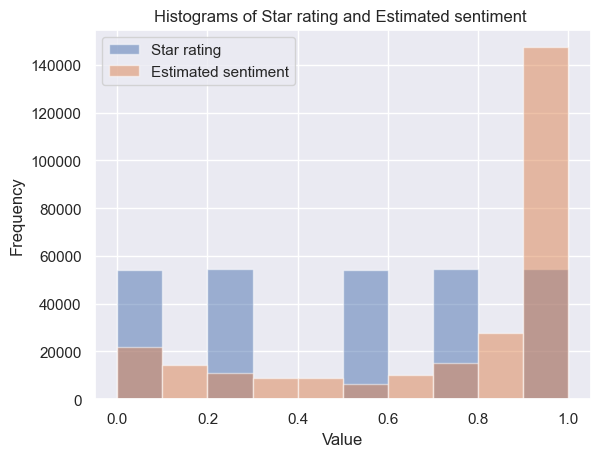

In [23]:
histogram_plot(stars_norm, vader_results_norm)

This approach is swift and easy to implement, but the results are not very impressing. The R2 is negative, which means that the model do not explain the variability of the response data. The distribution plot shows that the VADER compound score skewed towards positive values.

#### TextBlob

TextBlob is another Python library for processing textual data. It also provides two sentiment analysis implementations: PatternAnalyzer, based on a pattern library, and NaiveBayesAnalyzer, a Naive Bayes classifier trained on a movie reviews corpus. The nature of the output is the same as for NLTK VADER, so we can use the same approach to evaluate the performance of the model and compare it with the NLTK VADER results.

In [24]:
# again, TextBlob can not be accessed from the function unless you pass it as an argument:
def get_textblob_sentiment(item, TextBlob):
    return TextBlob(item["text"]).sentiment.polarity

textblob_results = test_df.p_apply(get_textblob_sentiment, args=[TextBlob], axis=1)

GET_TEXTBLOB_SENTIMENT DONE:   0%|          | 0/272120 [00:00<?, ?it/s]

Normalize both values to the same range (0 to 1):

In [25]:
textblob_results_norm = normalize_list(list(textblob_results))
stars_norm = normalize_list(list(test_df["stars"]))

Calculate the regression metrics:

In [26]:
calculate_regression_metrics(stars_norm, textblob_results_norm)

R2 = 0.2515179457635872


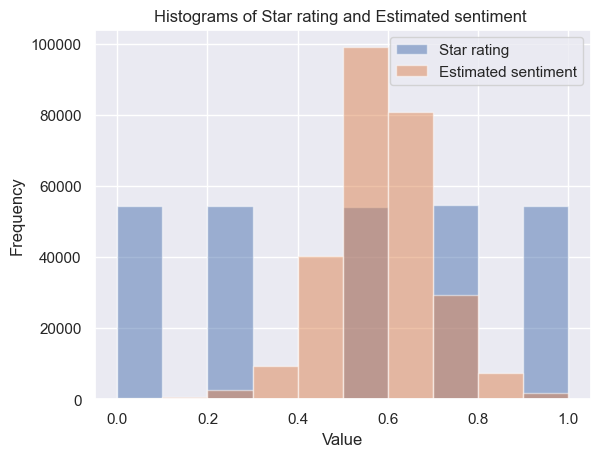

In [39]:
histogram_plot(stars_norm, textblob_results_norm)

The results is slightly better than for NLTK VADER, but still not very impressing. Both tools are quite fast. It took 1.5 minutes to process 700K reviews with NLTK VADER and less than a minute with TextBlob. The TextBlob's NaiveBayesAnalyzer classifier was also considered, but it was too slow each review took about 3 seconds to process, so the processing of the whole dataset would be impractical.

#### BERT (Bidirectional Encoder Representations from Transformers)

For the purpose of this project, I have selected a pre-trained BERT model that was specifically trained to access the sentiment of a text in terms of 5-star ratings (NLP Town, 2023.) The model is available in the Hugging Face Transformers library as [nlptown/bert-base-multilingual-uncased-sentiment](https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment). The pipeline is available as `sentiment-analysis` in the Transformers library:

In [27]:
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

/Users/dima/dev/cm3060_nlp_midterm/.venv/lib/python3.12/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


BERT is much slower than NLTK VADER or TextBlob, it took around 1 minute to process 1K reviews. So I had to limit the dataset to 100K reviews to get the results in reasonable time:

In [28]:
bert_test_df = test_df[:5000].copy()

In [30]:
def get_bert_sentiment(item, sentiment_pipeline):
    # Some reviews are too long for BERT to handle, so we truncate them to 512 tokens.
    # This is not ideal, but we can live with it for now.
    text = item["text"]
    if len(text) > 512:
        text = text[:512]

    return int(sentiment_pipeline(text)[0]["label"].split(" ")[0])

bert_results = bert_test_df.progress_apply(get_bert_sentiment, args=[sentiment_pipeline], axis=1)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [40]:
stars_norm = normalize_list(list(bert_test_df["stars"]))
bert_results_norm = normalize_list(list(bert_results))


calculate_regression_metrics(stars_norm, bert_results_norm)

R2 = 0.5965476990670606


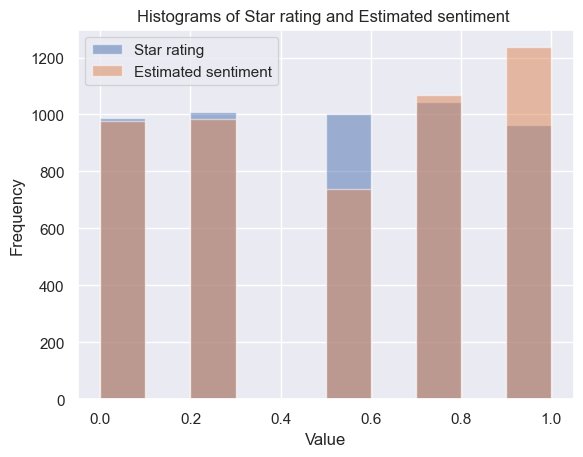

In [41]:
histogram_plot(stars_norm, bert_results_norm)

BERT shows the best results so far in terms of R2 score and distribution. The downside is that it is much slower than other tools. Being a deep learning model, BERT highly depends on the training data, so it is possible to improve the results even further by fine-tuning the model on the Yelp dataset.

### Baseline model

In this section, the Naive Bayes, Regression, and SVM models will be considered as baseline models.

#### Naive Bayes

Naive Bayes is a simple probabilistic classifier often used as a baseline for text classification tasks. It is a supervised learning method that uses the Bayes' theorem to calculate the probability of a class given a document. It is fast to train and predict, and it performs well in many real-world applications. However, it is inherently a classification algorithm, while all previous sentiment analysis tools were regression models that return continuous values. Anyway, it is worth trying to see how it performs compared to other tools.

Initialize CountVectorizer to convert text to a matrix of token counts. It does a basic preprocessing of the text, including tokenization, removing punctuation, and lowercasing. It also removes stop words:

In [42]:
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data with CountVectorizer:
X_train_vec = vectorizer.fit_transform(train_df['text'])

# Fit and transform the test data with CountVectorizer:
X_test_vec = vectorizer.transform(test_df['text'])

Use star-rating as labels:

In [43]:
y_train = train_df['stars']
y_test = test_df['stars']

Train the model:

In [44]:
nb = MultinomialNB()

nb.fit(X_train_vec, y_train)

MultinomialNB()

Evaluate the model:

In [56]:
y_pred = nb.predict(X_test_vec)

calculate_regression_metrics(y_test, y_pred)

R2 = 0.5028769081040703


With TF-IDF (Term Frequency - Inverse Document Frequency) vectorizer:

In [57]:
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the training data with CountVectorizer:
X_train_vec = vectorizer.fit_transform(train_df['text'])

# Fit and transform the test data with CountVectorizer:
X_test_vec = vectorizer.transform(test_df['text'])

KeyboardInterrupt: 

In [ ]:
nb = MultinomialNB()

nb.fit(X_train_vec, y_train)

MultinomialNB()

Evaluate the model:

In [ ]:
y_pred = nb.predict(X_test_vec)

calculate_regression_metrics(y_test, y_pred)

R2 = 0.5028769081040703


#### Logistic Regression

Converting text to TF-IDF features

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])

In [32]:
y = df['stars']

Split the dataset into training and testing sets for model validation:

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train the model (it takes about 1 hour to train the model on Apple M1 16 GB RAM):

In [36]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Evaluate the model:

In [38]:
y_pred = model.predict(X_test)

calculate_regression_metrics(y_test, y_pred)

MSE = 0.7132473538700456
R2 = 0.6737257060586066


#### Support Vector Machine (SVM)

In contrast to Naive Bayes, SVM can be used for both classification and regression tasks. It is a supervised learning method that uses a hyperplane to separate classes. However, it is computationally expensive and requires a lot of memory to train. Let's see how it performs on the Yelp dataset.

The fit time complexity of the SVR algorithm is more than quadratic with the number of samples which makes it hard to scale. It is not possible to run training on the full dataset, so limit the dataset to 70K reviews (roughly 1% of the full dataset):

In [21]:
svm_df = df.sample(frac=0.01, random_state=123)

In [22]:
svm_df.count()

stars    69903
text     69903
dtype: int64

In [23]:
svm_df["stars"] = MinMaxScaler().fit_transform(svm_df[["stars"]])

Feature extraction:

In [24]:
vectorizer = TfidfVectorizer(stop_words="english")

X = vectorizer.fit_transform(svm_df['text'])
y = svm_df['stars']


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=321)

Train the model:

In [26]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

Evaluate the model:

In [27]:
y_pred = svr.predict(X_test)

In [28]:
calculate_metrics(y_test, y_pred)

MSE = 0.04453992722709433
R2 = 0.6742206178593498


### BERT Fine-tuning

From all evaluated models, BERT showed the most promising results. It is not surprising, as in many papers that compare the performance of machine learning models on NLP tasks again and again the deep learning models, like BERT, show the best results. However, BERT just like any other deep learning model highly depends on the training data. So it is possible to even further improve the results by fine-tuning the model on the Yelp dataset. In this section, we will fine-tune the BERT model on the Yelp dataset and evaluate its performance.

We need to prepare the data for BERT fine-tuning. The metadata of the model contains the information on how the labels are encoded. In this case, the labels are encoded as integers from 0 to 4:

In [58]:
# Convert training data to compatible format:
bert_train_df = train_df.copy()
bert_train_df.rename(columns={"stars": "labels"}, inplace=True)
bert_train_df["labels"] = bert_train_df["labels"] - 1

# Convert test data to compatible format:
bert_test_df = test_df.copy()
bert_test_df.rename(columns={"stars": "labels"}, inplace=True)
bert_test_df["labels"] = bert_test_df["labels"] - 1

We need to convert training and test dataset from Pandas DataFrame to Hugging Face [Dataset](https://huggingface.co/docs/datasets/index) format:

In [59]:
train_ds = Dataset.from_pandas(bert_train_df)
test_ds = Dataset.from_pandas(bert_test_df)

Save both datasets to disk for future use (the size of the dataset is quite large, so it takes time to load it):

In [60]:
train_ds.save_to_disk("train_ds")
test_ds.save_to_disk("test_ds")

Saving the dataset (0/4 shards):   0%|          | 0/2449080 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/272120 [00:00<?, ? examples/s]

Load the datasets from disk:

In [5]:
train_ds = Dataset.load_from_disk("train_ds")
test_ds = Dataset.load_from_disk("test_ds")

It takes weeks to train the model on the full dataset, so we will limit the dataset to 10K reviews (roughly 0.15% of the full dataset) for testing dataset and stop the training after several epochs:

In [6]:
# train_ds = train_ds.select(range(100000))
test_ds = test_ds.select(range(10000))

Configure training:

In [ ]:
training_args = TrainingArguments(
    "trainer_results",
    overwrite_output_dir = True,
    evaluation_strategy = "steps"
)

In [ ]:
trainer = SFTTrainer(
    model = "nlptown/bert-base-multilingual-uncased-sentiment",
    args = training_args,
    train_dataset = train_ds,
    eval_dataset = test_ds,
    dataset_text_field = "text",
    max_seq_length = 512,
)


Evaluate the model before training:

In [ ]:
trainer.evaluate()

Run training:

In [ ]:
trainer.train()

### Evaluation

In this section, the evaluation of the fine-tuned BERT model will be performed. The evaluation will be done on the test set. The test set contains 100K reviews, which is roughly 1.5% of the full dataset. The evaluation will be done using the same metrics as in the baseline model section.

Load the fine-tuned model from the training checkpoint:

In [36]:
checkpoint_path = "./checkpoint-15500/"

sentiment_pipeline = pipeline("sentiment-analysis", model=checkpoint_path, tokenizer=checkpoint_path)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ./checkpoint-15500/ and are newly initialized: ['bert.pooler.dense.weight', 'classifier.weight', 'bert.pooler.dense.bias', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [37]:
bert_test_df = test_df[:100000]

In [38]:
bert_results = bert_test_df.progress_apply(get_bert_sentiment, args=[sentiment_pipeline], axis=1)

  0%|          | 0/100000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
bert_test_df["bert_finetunned_results"] = MinMaxScaler().fit_transform(bert_results)

In [ ]:
calculate_regression_metrics(test_df["stars"], test_df['bert_finetunned_results'])

In [ ]:
histogram_plot(test_df['stars'], test_df['bert_finetunned_results'])

## Conclusions

### Summary of the results

#### Pre-trained sentiment analysis tools (regression)

| Model       | R2     |
| ----------- | ------ |
| NLTK VADER  | 0.302  |
| TextBlob    | 0.275  |
| **BERT**    | **0.583**  |


#### Baseline models (classification)

| Model                          | F2 Score |
| ------------------------------ | -------- |
| Naive Bayes (CountVectorizer)  | -     |
| Naive Bayes (TF-IDF)           | -     |

#### Baseline models (regression)

| Model                          | R2          |
| ------------------------------ | ----------- |
| Logistic Regression (TF-IDF)   | 0.673       |
| Support Vector Machine (TF-IDF)| 0.674       |
| **BERT Fine-tunned**           | **-**   |


### Discussion

Not very novel, but present a modern approach to tackle particular problem in NLP where we tried and evaluated different approaches started from classic feature engineering machine learning ones ending advanced state of the art models. Compare results and see the full landscape of the possible solutions.

## References

Yelp Inc. (2012) _Survey: 85% of Consumers Use the Internet to Find Local Businesses_ [Online] Available from: https://blog.yelp.com/businesses/survey-85-of-consumers-use-the-internet-to-find-local-businesses/ [19 December 2023].

Luca, M. (2011) _Reviews, Reputation, and Revenue: The Case of Yelp.Com_ [Online] Available from: https://www.hbs.edu/ris/Publication%20Files/12-016_a7e4a5a2-03f9-490d-b093-8f951238dba2.pdf [19 December 2023].

Hutto, C.J., Gilbert, E.E. (2014) _VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text._ [Online] Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014. Available from: https://ojs.aaai.org/index.php/ICWSM/article/view/14550/14399 [20 December 2023].

Martiti, Juliane C. (2021) _Implementation of Naive Bayes Algorithm on Sentiment Analysis Application_ [Online] Informatics Engineering Department, STMIK AMIK Bandung, Indonesia Available from: https://www.researchgate.net/publication/357216457_Implementation_of_Naive_Bayes_Algorithm_on_Sentiment_Analysis_Application [20 December 2023].

Satia Budhi G., Chiong R., Pranata I., Hu Z. (2021) _Using Machine Learning to Predict the Sentiment of Online Reviews: A New Framework for Comparative Analysis_ [Online] Available from: https://repository.petra.ac.id/20065/1/Publikasi1_02030_6879.pdf [21 December 2023].

Devlin J., Chang M., Lee K., Toutanova K. (2018) _BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding_ [Online] Available from: https://arxiv.org/abs/1810.04805 [20 December 2023].

Sanh V., Debut L., Chaumond J., Wolf T. (2020) _DistilBERT, a distilled version of BERT: smaller, faster, cheaper and lighter_ [Online] Available from: https://arxiv.org/abs/1910.01108 [22 December 2023].

Yelp Inc. (2023) _Yelp Open Dataset_ [Online] Yelp Inc. Available from: https://www.yelp.com/dataset [19 December 2023].

NLP Town (2023) _bert-base-multilingual-uncased-sentiment (Revision edd66ab)_ [Online] Hugging Face. Available from: https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment [23 December 2023].